<a href="https://colab.research.google.com/github/nallinwerlang/ML/blob/main/01_ARTIGO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DETECÇÃO DE SMURFING

## Pré-processamento (ETL Process - Load Data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
dados = pd.read_excel('/content/drive/MyDrive/ufsc/ML/Artigo/CASO_TESTE2.xlsx') 
dados.head()

,NOME_TITULAR,DESCRICAO_LANCAMENTO,CNAB,DATA_LANCAMENTO,VALOR_TRANSACAO,NATUREZA_LANCAMENTO,SMURFING
0,ANDREZA RAMOS DA ROSA,DEPOSITO EM DINHEIRO NO CAIXA,220,2010-01-11,1000.00,C,1
1,ANDREZA RAMOS DA ROSA,DEPOSITO EM DINHEIRO NO CAIXA,220,2010-01-11,1000.00,C,1
2,ANDREZA RAMOS DA ROSA,CREDITO DE SALARIO,205,2010-02-05,440.73,C,0
3,ANDREZA RAMOS DA ROSA,TRANSF SALDO C/SAL P/ CC,117,2010-02-05,440.73,D,0
4,ANDREZA RAMOS DA ROSA,CREDITO DE SALARIO,205,2010-03-05,455.28,C,0


##Análise do conjunto de dados

In [23]:
NATUREZA_LANCAMENTO = dados['NATUREZA_LANCAMENTO'].value_counts(normalize=True)*100
NATUREZA_LANCAMENTO

D    61.139296
C    38.860704
Name: NATUREZA_LANCAMENTO, dtype: float64

Text(0, 0.5, 'Porcentagem (%)')

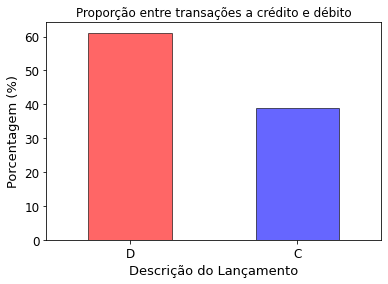

In [73]:
import matplotlib.pyplot as plt

NATUREZA_LANCAMENTO.plot.bar(color=['red', 'blue'], ec='k', alpha=0.6)
plt.title('Proporção entre transações a crédito e débito')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Descrição do Lançamento', fontsize=13)
plt.ylabel('Porcentagem (%)', fontsize=13)

In [ ]:
CNAB = dados['CNAB'].value_counts(normalize=True)*100
CNAB

In [29]:
SMURFING = dados['SMURFING'].value_counts()
SMURFING

0    6471
1     428
Name: SMURFING, dtype: int64

Text(0, 0.5, 'Porcentagem (%)')

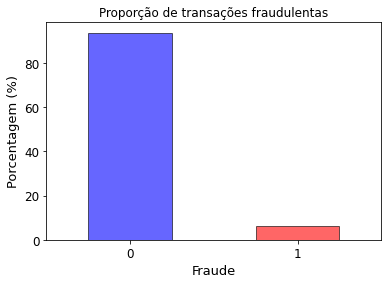

In [66]:
SMURFING = dados['SMURFING'].value_counts(normalize=True)*100

SMURFING.plot.bar(color=['blue', 'red'], ec='k', alpha=0.6)
plt.title('Proporção de transações fraudulentas')
plt.xticks(rotation = 360, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Fraude', fontsize=13)
plt.ylabel('Porcentagem (%)', fontsize=13)

In [ ]:
DESCRICAO_LANCAMENTO = dados['DESCRICAO_LANCAMENTO'].value_counts(normalize=True)*100
DESCRICAO_LANCAMENTO

##Codificação das variáveis categóricas

In [45]:
#Transformar a NATUREZA DO LANÇAMENTO em valores binários, onde CRÉDITO é 1 e DÉBITO é 0
dados['NATUREZA_LANCAMENTO'] = dados['NATUREZA_LANCAMENTO'].replace('C', 1)
dados['NATUREZA_LANCAMENTO'] = dados['NATUREZA_LANCAMENTO'].replace('D', 0)

#Transformar a DATA DO LANÇAMENTO em DIA, MÊS e ANO (valores inteiros)
dados['DATA_LANCAMENTO'] =  pd.to_datetime(dados['DATA_LANCAMENTO'], format='%d/%m/%Y')
dados['ANO_LANCAMENTO'] = dados['DATA_LANCAMENTO'].dt.year
dados['MES_LANCAMENTO'] = dados['DATA_LANCAMENTO'].dt.month
dados['DIA_LANCAMENTO'] = dados['DATA_LANCAMENTO'].dt.day

#Excluir a coluna original
dados.drop(['DATA_LANCAMENTO'], axis=1, inplace=True)

dados.dtypes

NOME_TITULAR             object
DESCRICAO_LANCAMENTO     object
CNAB                      int64
VALOR_TRANSACAO         float64
NATUREZA_LANCAMENTO       int64
SMURFING                  int64
ANO_LANCAMENTO            int64
MES_LANCAMENTO            int64
DIA_LANCAMENTO            int64
dtype: object

In [46]:
#O método get_dummies transforma as varivéis categóricas em colunas de valores binários e deleta a primeira coluna dos valores criados
dados = pd.get_dummies(dados,drop_first=True)


##Separar as variáveis independentes (X) da variável target, alvo (Y)

In [48]:
#Isolar a coluna target SMURGING (y) do conjunto de variáveis independentes (X)
X1 = dados.iloc[:,0:3]
X2 = dados.iloc[:,4:]
X = pd.concat([X1,X2],axis=1)
X

#Alocar a coluna SMURFING no conjunto Y
y = dados.iloc[:,3:4] 
y

,SMURFING
0,1
1,1
2,0
3,0
4,0
...,...
6894,0
6895,0
6896,0
6897,0


In [75]:
X

,CNAB,VALOR_TRANSACAO,NATUREZA_LANCAMENTO,ANO_LANCAMENTO,MES_LANCAMENTO,DIA_LANCAMENTO,NOME_TITULAR_CHARLES DA SILVA FARIAS,NOME_TITULAR_CRISTIANE CORDEIRO LEITAO,NOME_TITULAR_DAIANA APARECIDA DIAS,NOME_TITULAR_DANIEL FELIPE PORTO MARAVALHAS,...,DESCRICAO_LANCAMENTO_TRANSFERENCIA PARA POUPANCA,DESCRICAO_LANCAMENTO_TRANSFERENCIA PROGRAMADA,DESCRICAO_LANCAMENTO_TRANSFERIDO PARA POUPANCA,DESCRICAO_LANCAMENTO_TRX EL TEV,DESCRICAO_LANCAMENTO_TV POR ASSINATURA,DESCRICAO_LANCAMENTO_UNB *MAESTRO/RSHOP 07/08,DESCRICAO_LANCAMENTO_UNB *MAESTRO/RSHOP 22/05,DESCRICAO_LANCAMENTO_UNB *MAESTRO/RSHOP 28/05,DESCRICAO_LANCAMENTO_UNB *MAESTRO/RSHOP 31/05,DESCRICAO_LANCAMENTO_UNB COMPRA REDESHOP
0,220,1000.00,1,2010,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,220,1000.00,1,2010,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,205,440.73,1,2010,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,117,440.73,0,2010,2,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,205,455.28,1,2010,3,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,206,157.40,1,2010,12,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6895,106,55.78,0,2010,12,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6896,206,209.60,1,2011,5,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6897,106,600.00,0,2011,5,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Conjunto de treinamento e teste

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0)

In [50]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5519, 1558), (1380, 1558), (5519, 1), (1380, 1))

##Normalização das variáveis

In [51]:
#Escalar as variáveis

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Modelos de classificação

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(random_state = 0)
modelo_log.fit(X_train,y_train)
y_pred_log = modelo_log.predict(X_test)

### **SVM**

In [ ]:
from sklearn.svm import SVC
modelo_svm = SVC(kernel='linear', random_state = 0)# rbf , polinomial
modelo_svm.fit(X_train,y_train)
y_pred_svm = modelo_svm.predict(X_test)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
modelo_rf.fit(X_train,y_train)
y_pred_rf = modelo_rf.predict(X_test)

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors = 3)
modelo_knn.fit(X_train,y_train)
y_pred_knn = modelo_knn.predict(X_test)

##Avaliação dos modelos

#### **Matriz de Confusão**

In [56]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test,y_pred_log)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_knn = confusion_matrix(y_test,y_pred_knn)


In [57]:
cm_log

array([[1281,   12],
       [  15,   72]])

In [58]:
cm_log

array([[1281,   12],
       [  15,   72]])

In [76]:
cm_svm

array([[1274,   19],
       [   2,   85]])

In [77]:
cm_rf

array([[1292,    1],
       [   0,   87]])

In [78]:
cm_knn

array([[1283,   10],
       [  18,   69]])

###Métricas: Classification Report (Recall, Precision, F1-Score, Acc)

In [59]:
from sklearn.metrics import classification_report

classes = ['Classe 0', 'Classe 1']

print('Random Forest:')
print(classification_report(y_pred_rf, y_test, target_names=classes))

Random Forest:
              precision    recall  f1-score   support

    Classe 0       1.00      1.00      1.00      1292
    Classe 1       1.00      0.99      0.99        88

    accuracy                           1.00      1380
   macro avg       1.00      0.99      1.00      1380
weighted avg       1.00      1.00      1.00      1380



In [60]:
print('KNN:')
print(classification_report(y_pred_knn, y_test, target_names=classes))

KNN:
              precision    recall  f1-score   support

    Classe 0       0.99      0.99      0.99      1301
    Classe 1       0.79      0.87      0.83        79

    accuracy                           0.98      1380
   macro avg       0.89      0.93      0.91      1380
weighted avg       0.98      0.98      0.98      1380



In [79]:
print('Logistic Regression:')
print(classification_report(y_pred_log, y_test, target_names=classes))

Logistic Regression:
              precision    recall  f1-score   support

    Classe 0       0.99      0.99      0.99      1296
    Classe 1       0.83      0.86      0.84        84

    accuracy                           0.98      1380
   macro avg       0.91      0.92      0.92      1380
weighted avg       0.98      0.98      0.98      1380



In [80]:
print('SVM:')
print(classification_report(y_pred_svm, y_test, target_names=classes))

SVM:
              precision    recall  f1-score   support

    Classe 0       0.99      1.00      0.99      1276
    Classe 1       0.98      0.82      0.89       104

    accuracy                           0.98      1380
   macro avg       0.98      0.91      0.94      1380
weighted avg       0.98      0.98      0.98      1380



####F1 Score

In [61]:
from sklearn.metrics import f1_score
f1_log = f1_score(y_test,y_pred_log)
f1_svm = f1_score(y_test,y_pred_svm)  
f1_rf = f1_score(y_test,y_pred_rf) 
f1_knn = f1_score(y_test,y_pred_knn) 

In [62]:
print('F1 Logistic Regression: ', f1_log)
print('F1 SVM: ', f1_svm)
print('F1 Random Fortest: ', f1_rf)
print('F1 Knn: ', f1_knn)


F1 Logistic Regression:  0.8421052631578947
F1 SVM:  0.8900523560209425
F1 Random Fortest:  0.9942857142857142
F1 Knn:  0.8313253012048193


####Accuracy

In [63]:
acc_log = (cm_log[0,0]+cm_log[1,1])/cm_log.sum()
acc_svm = (cm_svm[0,0]+cm_svm[1,1])/cm_svm.sum()
acc_rf = (cm_rf[0,0]+cm_rf[1,1])/cm_rf.sum()
acc_knn = (cm_knn[0,0]+cm_knn[1,1])/cm_knn.sum()

In [64]:
print('ACC Logistic Regression: ', acc_log)
print('ACC SVM: ', acc_svm)
print('ACC Random Fortest: ', acc_rf)
print('ACC Knn: ', acc_knn)


ACC Logistic Regression:  0.9804347826086957
ACC SVM:  0.9847826086956522
ACC Random Fortest:  0.9992753623188406
ACC Knn:  0.9797101449275363
